# Bitcoin Price Prediction
using time series analysis

## 평활화 모형
- 이동평균 (Moving Average)
- 지수평활
- 윈터스 모형
- 분해법

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from chart_studio import tools
from chart_studio.plotly import plot, iplot
import chart_studio.plotly as py
import plotly.graph_objects as go
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


### 단순이동평균 (Simple Moving Average)
- 시계열 데이터 $\{X_1, X_2, ...\}$가 수평적 패턴일 때 사용
- $M_t = \frac{1}{N}(X_{t-N+1}+...+X_t)$

In [14]:
# Simple Moving Average, N=4
close_MA4 = df.iloc[:,1].rolling(window=4).mean()
close_MA8 = df.iloc[:,1].rolling(window=8).mean()

In [19]:
pd.concat([close_MA4, close_MA8], axis=1).tail(10)

,close,close
2971,52184.425,49982.2250
2972,53872.925,51051.2250
2973,55211.575,52334.3625
2974,55843.975,53017.9125
2975,54095.125,53139.7750
2976,52538.575,53205.7500
2977,49912.250,52561.9125
2978,47970.700,51907.3375
2979,47277.075,50686.1000
2980,46143.700,49341.1375


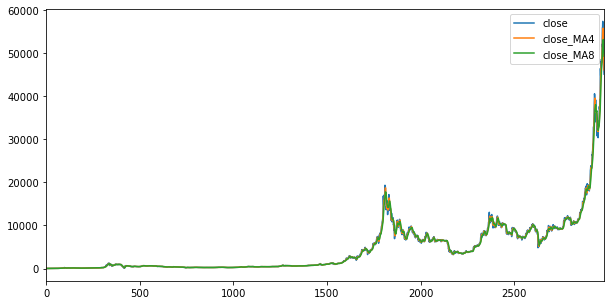

In [15]:
plt.figure(figsize=(10, 5))
df['close'].plot()
close_MA4.plot()
close_MA8.plot()
plt.legend(['close', 'close_MA4', 'close_MA8'])

* N이 커질수록 평활 효과가 커짐
    - 더 완만한 곡선

(2954.0, 2981.0)

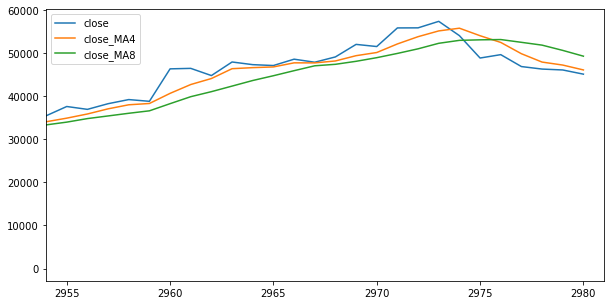

In [29]:
# 21.02.01 - 21.02.28
plt.figure(figsize=(10, 5))
df['close'].plot()
close_MA4.plot()
close_MA8.plot()
plt.legend(['close', 'close_MA4', 'close_MA8'])
plt.xlim(2954, len(df))

### Double Moving Average
이중이동평균 (Double Moving Average)
- 시계열 데이터 $\{X_1, X_2, ...\}$가 추세 패턴을 따를 때 사용

시계열이 다음과 같이 선형추세를 갖는다고 가정하자.

$$X_t = c + bt + a_t$$
- 단순이동평균 $M_t$는 추세를 늦게 따라감
    - $E[M_t] = c + bt - \frac{N-1}{2}b \Rightarrow E[M_t]+\frac{N-1}{2}b=c+bt$
- 이를 보정하기 위해 이중 이동평균을 활용
  
$$M_t = \frac{1}{N}(X_{t-N+1}+...+X_t)$$
$$M_t^{(2)} = \frac{1}{N}(X_{t-N+1}+...+X_t)$$
